** 한국어 **  
주어진 이미지에 대하여 다음 규칙에 따라 큰 범위의 region을 선택하고 해당 region에 대한 paragraph를 생성해줘.
paragraph는 40단어 이내로 만들어줘.
위 예제는 2~3개 정도 만들면 돼.

[region 선택 규칙]
- 원근법
- 객체 위주
- 객체 간의 관련성 높은 것부터
- 이미지의 특이점
- 난이도 별 프롬프트 변화

** 영어 **
Based on the given image, select large regions according to the following rules and create a paragraph for each region. Each paragraph should be within 40 words. Provide 2-3 examples as shown below.

[Region selection rules]

Perspective
Object-oriented
Prioritize highly related objects
Distinguish unique points of the image
Adjust prompt complexity based on difficulty

In [ ]:
# 예시 - output_2100.json 사용

In [3]:
import openai
import json
from IPython.display import Image, display, Audio, Markdown
import base64

# Preview image for context

# OpenAI API 키 설정
openai.api_key = ''

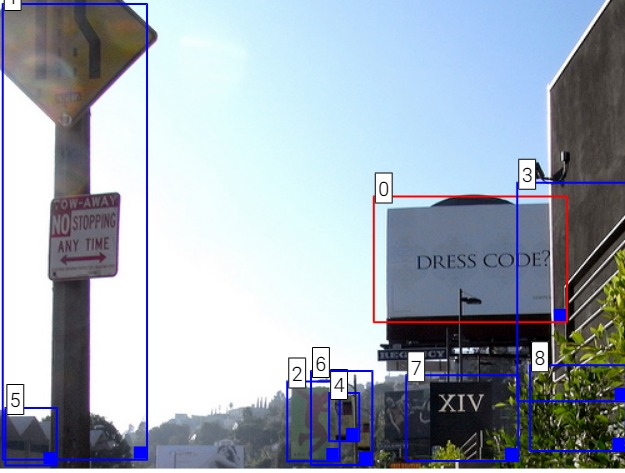

number of box:  9
['black lights', 'building', 'red and white', 'square red', 'pole', 'sign', 'yellow street sign', 'yellow', 'yellow sign', 'black and white', 'black sign', 'large white', 'black', 'part of', 'board', 'dress code', 'billboard', 'person', 'green shrubs', 'leaves', 'letters', 'buildings', 'distance', 'clear blue sky', 'sky', "person's face", 'this is', 'tree', 'writing', 'figure', 'tall building', 'camera', 'hill', 'black and yellow', 'houses', 'part', 'blue sky', 'parf', 'sunny day', 'white', 'street light', 'city', 'green', 'railing', 'iron']
예제 ID: 1289, GPT 결과: ### Region 1: Sign
The yellow street sign indicates a no-stopping zone, emphasizing traffic regulations. Its clear visibility ensures drivers are aware of the restrictions, contributing to road safety in the area.

### Region 2: Billboard
The large billboard prominently displays the phrase "DRESS CODE?" This eye-catching advertisement likely aims to attract attention and provoke curiosity among passersby, enha

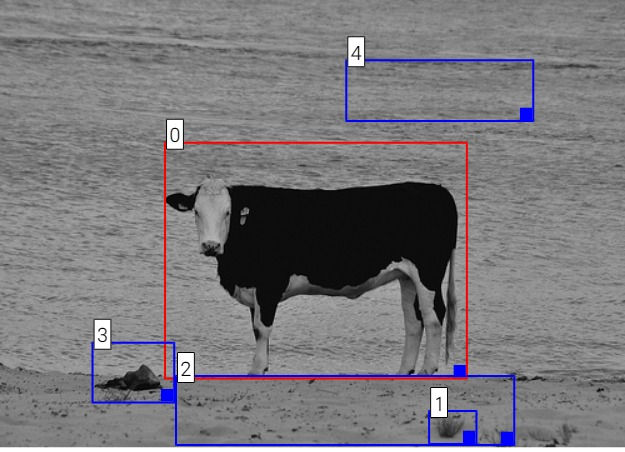

number of box:  5
['beach', 'sand', 'water', 'cow', 'grass', 'nose', 'mouth', 'eyes', 'face', 'ground', 'rock', 'tail', 'ripples', 'white spot', 'rocks', 'head fur', 'foot', 'ear', 'grass patch', 'eye', 'left leg', 'leg']
예제 ID: 1300, GPT 결과: ### Region 0: Cow
The cow stands prominently on the beach, showcasing its distinct black and white markings. Its posture and presence create a striking contrast against the sandy backdrop, emphasizing the unique juxtaposition of livestock in a coastal environment.

### Region 1: Rocks
The small rocks near the water's edge add texture to the sandy beach. Their irregular shapes and earthy tones contrast with the smoothness of the sand, contributing to the natural beauty of the coastal landscape.

### Region 2: Ground
The sandy ground beneath the cow is soft and light-colored, providing a warm base for the scene. This area highlights the beach setting, enhancing the overall atmosphere of tranquility and nature's simplicity.


[None, None]

In [6]:
def load_data(file_num):
    """
    @description
    주어진 경로에서 JSON 파일을 불러와 오브젝트를 추출하는 함수
    """

    try:
        IMAGE_PATH = f"C:\\workplace\\Kilab\\etri\\dataset\\취합\\평가셋\\images for Task-B\\boxedImage{file_num}.jpg"
        display(Image(IMAGE_PATH))
        with open(IMAGE_PATH, "rb") as image_file:
            base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    except :
        base64_image = ""
    
    object_list=[]
    try :
        file_path =f'C:\\workplace\\Kilab\\git\\caption_tool\\typescript\\front\\public\\json\\outputJson\\output_{file_num}.json'
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        sorted_boxes = sorted(data['new_bounding_boxes'],key=lambda x: len(x['captions']), reverse=True)
        print("number of box: ",len(sorted_boxes))
        object_list = list(data[list(data.keys())[0]]['new_objects'].keys())
        print(object_list)
    except :
        print("json 데이터 읽는 중 오류 발생")
    finally :
        return object_list, base64_image
    
def generate_paragraph(file_num, model="gpt-4o-mini", temperature=0):
    """
    @description
    주어진 입력 데이터에 기반하여 GPT 모델을 통해 추론을 생성하는 함수
    """
    # 오브젝트 리스트 + 이미지 뽑아내기
    object_list, base64_image = load_data(file_num)
    
    # 프롬프트 생성
    # 이미지의 오브젝트간 연관성을 기준으로 큰 범위의 바운딩박스를 생성 
    prompt = (
        f"""
        Based on the given image, select large regions according to the following rules and create a paragraph for each region. 
        Each paragraph should be within 40 words. Provide 2-3 examples as shown below.
        Create a large range of bounding boxes based on the correlation between region in the image.
        
        [Region selection rules]

        Perspective
        Object-oriented
        Prioritize highly related objects
        Distinguish unique points of the image
        Adjust prompt complexity based on difficulty
        
        [Objects observed in the image]
        {str(object_list)}
            
        """
    )
    
    # GPT 모델에 요청
    response = openai.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a intelligent AI assistant."},
            {"role": "user", "content": [
                {"type":"text","text":prompt},
                {"type": "image_url", "image_url": {
                    "url": f"data:image/png;base64,{base64_image}"
                    }
                }
                ]
             }
        ],
        max_tokens=200,
        n=1,
        # stop=None,
        temperature=temperature
    )
    
    return response.choices[0].message.content.strip()


# 평가 데이터 파일 경로
# 결과 저장을 위한 리스트 초기화

    
def save_json(file_num):
    """
    @description
    generate_paragraph를 호출해 받아온 데이터를 JSON 파일로 저장하는 함수
    """
    
    # generate_paragraph 호출
    # 이미지에 대한 답 생성
    result = ""
    result = generate_paragraph(file_num)
    print(f"예제 ID: {file_num}, GPT 결과: {result}")
    
    # 데이터 생성
    # 기존 output 데이터 + paragraph 키 붙임
    data={}
    try :
        file_path =f'C:\\workplace\\Kilab\\git\\caption_tool\\typescript\\front\\public\\json\\outputJson\\output_{file_num}.json'
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
    except :
        print("json 데이터 읽는 중 오류 발생")
    finally :
        data['paragraph']={'gpt_version':result,
                           'annotator_version':result}
        
        
    with open(f'paragraph{file_num}.json', 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

file_list  = [1289, 1300]
file_num = 2100
[save_json(file_num) for file_num in file_list]